# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [187]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy as sp

In [188]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [189]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


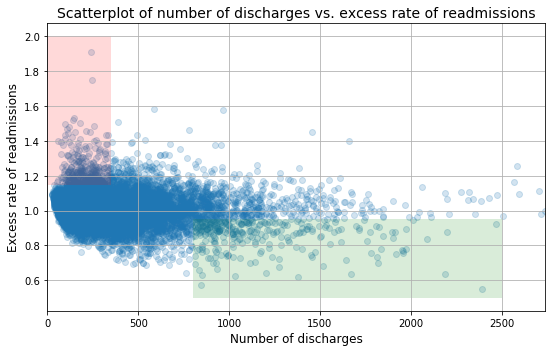

In [190]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Readmission rates in the whole data

In [191]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [192]:
# Set up pearson correlation test 
import scipy.stats as stats

In [193]:
# Create new dataframe focused only on number of discarges and excess readmission ratio
x = pd.DataFrame(x)
y = pd.DataFrame(y)
new_df = pd.concat([x,y], axis=1)
new_df.columns = ['Number of Discharges', 'Excess Readmission Ratio']
new_df.describe()

,Number of Discharges,Excess Readmission Ratio
count,11494.000000,11494.000000
mean,364.313729,1.007541
std,299.546395,0.091912
min,25.000000,0.549500
25%,159.250000,0.952700
50%,281.000000,1.003550
75%,474.000000,1.058075
max,2740.000000,1.909500


In [194]:
# Compute the pearson correlation coefficient and p-value
corr = stats.pearsonr(x,y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))

The Pearson correlation coefficient: [-0.09309554]
The p-value of a two-tailed test: [1.50227564e-23]


A pearson correlation test offers insight in the whole comprehensive data. The correlation coefficient of -0.093 indicates that there is negative but weak correlation between hospital discharges and readmission rates. Furthermore, the the p-value is less than the alpha level of 1%, indicating statistical significance. As such, there is evidence that hospiatal size and readmission correlate with each other.

### Readmission rates among larger hospitals (more than 1000 discharges)

In [195]:
# Test greater than 1000 discharges
greater_than_1000 = new_df[(new_df['Number of Discharges']>1000)]
mean_excess_redmission_rate_1000 = np.mean(greater_than_1000['Excess Readmission Ratio'])
data_excess_1000 = greater_than_1000[(greater_than_1000['Excess Readmission Ratio']>1)]
percentage_with_excess_rate_a = len(data_excess_1000)/len(greater_than_1000)*100

print("Among hospitals with over 1000 discharges, the mean excess readmission rate is {:2.3f} and {:2.2f}% of hospitals have readmission rates over 1.".format(mean_excess_redmission_rate_1000,percentage_with_excess_rate))

Among hospitals with over 1000 discharges, the mean excess readmission rate is 0.979 and 44.57% of hospitals have readmission rates over 1.


Initial report states that among hospitals with more than 1000 discharges, the mean excess readmission rate is 0.978 and that 44% of hospitals have readmission rates over 1. Statistical analysis supports this claim with similar results.

### Readmission rates among smaller hospitals (less than 100 discharges)

In [196]:
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
less_than_100 = new_df[(new_df['Number of Discharges']<100) & (new_df['Number of Discharges']>0)]
mean_excess_redmission_rate_100 = np.mean(less_than_100['Excess Readmission Ratio'])
data_excess_100 = less_than_100[(less_than_100['Excess Readmission Ratio']>1)]
percentage_with_excess_rate_b = len(data_excess_100)/len(less_than_100)*100

print("Among hospitals with less than 100 dischargers, the mean excess readmission rate is {:2.3f} and {:2.2f}% of hospitals have readmission rates over 1.".format(mean_excess_redmission_rate_100,percentage_with_excess_rate_b))

Among hospitals with less than 100 dischargers, the mean excess readmission rate is 1.023 and 63.22% of hospitals have readmission rates over 1.


In [197]:
t_test_result = stats.ttest_ind(data_excess_1000['Excess Readmission Ratio'],data_excess_100['Excess Readmission Ratio'])
print("The t-statistic shows that T-statistic is {:2.5f} and the p-value is {:2.5f}.".format(t_test_result[0],t_test_result[1]))

The t-statistic shows that T-statistic is 6.02784 and the p-value is 0.00000.


The initial report states that among smaller hospitals, mean excess readmission rate is 1.023 and that 63% of hospitals have excess readmission rate greater than 1. The statsticial analysis supports this claim.

Furthermore, an independent 2-sample t-test shows that the readmission ratio between smaller and larger hospitals is significant. Subsequently, this shows that hospital size is involved in readmission rates.

### Plotting Data

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


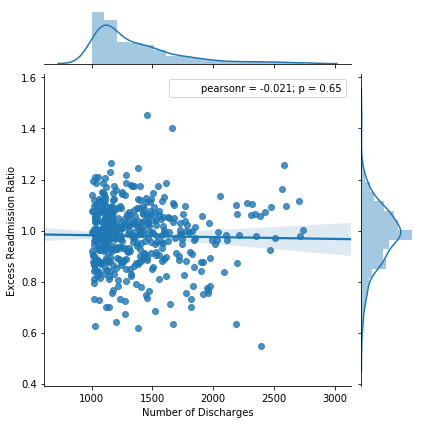

In [198]:
# Greater than 1000
plot_a = sns.jointplot('Number of Discharges','Excess Readmission Ratio',data=greater_than_1000,kind='reg')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


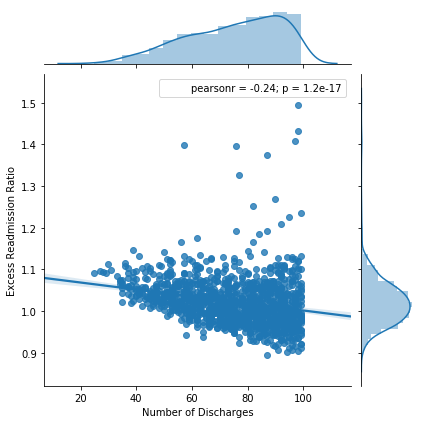

In [199]:
# Less than 100
sns.jointplot('Number of Discharges','Excess Readmission Ratio',data=less_than_100,kind='reg')

In [200]:
# Less than 300
mean_excess_redmission_rate_300 = np.mean(less_than_300['Excess Readmission Ratio'])
data_excess_300 = less_than_300[(less_than_300['Excess Readmission Ratio']>1)]
percentage_with_excess_rate_c = len(data_excess_300)/len(less_than_300)*100

print("Among hospitals with less than 300 dischargers, the mean excess readmission rate is {:2.3f} and {:2.2f}% of hospitals have readmission rates over 1.".format(mean_excess_redmission_rate_300,percentage_with_excess_rate_c))

Among hospitals with less than 300 dischargers, the mean excess readmission rate is 1.014 and 53.75% of hospitals have readmission rates over 1.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


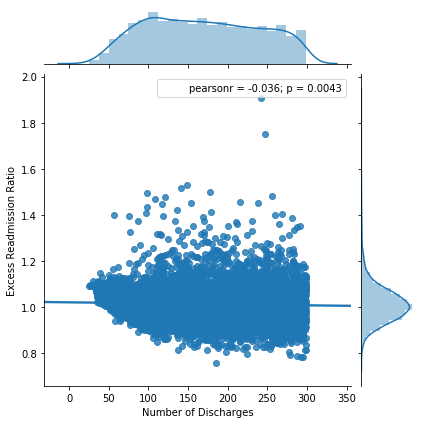

In [201]:
less_than_300 = new_df[(new_df['Number of Discharges']<300)]

sns.jointplot('Number of Discharges','Excess Readmission Ratio',data=less_than_300,kind='reg')

The data shows that that number of discharges negatively correlates with excess readmissions. When examining hospitals with discharges less than 100, less than 300 or more than 1000, readmission rates decreases while discharges increase.

In [202]:
greater_than_1000.describe()

,Number of Discharges,Excess Readmission Ratio
count,460.000000,460.000000
mean,1361.269565,0.979073
std,350.438731,0.119358
min,1002.000000,0.549500
25%,1107.000000,0.909025
50%,1241.000000,0.986700
75%,1508.000000,1.057100
max,2740.000000,1.454300


In [203]:
less_than_100.describe()

,Number of Discharges,Excess Readmission Ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [204]:
less_than_300.describe()

,Number of Discharges,Excess Readmission Ratio
count,6108.000000,6108.000000
mean,169.507695,1.014238
std,69.856447,0.082478
min,25.000000,0.760200
25%,111.000000,0.961100
50%,166.000000,1.006850
75%,227.250000,1.056525
max,299.000000,1.909500


### Conclusion and Discussion

The initial report suggests that hospital sizes affect hospital readmission. Pearson correlation tests show that there is a statistical significance between readmission rates of hospitals depending on capacity as larger hospitals have lower excess readmission ratios. However, the actual mean readmission ratio between the different hospitals groups show that the actual readmission ratio is very small. Furthermore, the Pearson tests show that while there is a negative correlation between hospital size and readmission ratios, the actual coefficient is less the 0.5. As such, while the test do show that while hospital size may negatively correlates with readmission, such relationship is rather weak. As such, I would not recommend that smaller hospitals upgrade their facilities.  